In [769]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline

In [580]:
df_math = pd.read_csv('student-mat.csv')
df_port = pd.read_csv('student-por.csv')


In [581]:
df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [582]:
df_port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


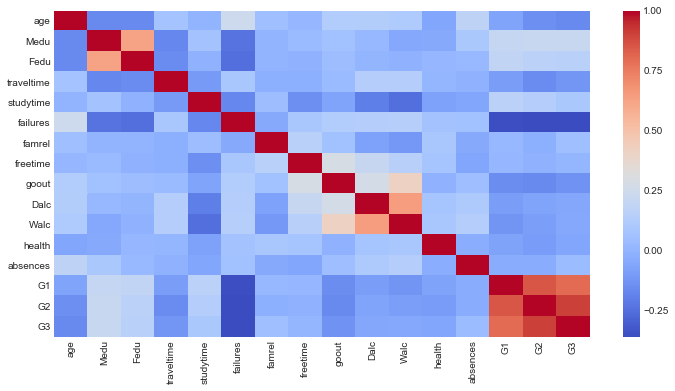

In [583]:
plt.figure(figsize = (12,6))
sns.heatmap(df_math.corr(), cmap = 'coolwarm')


In [584]:
df_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


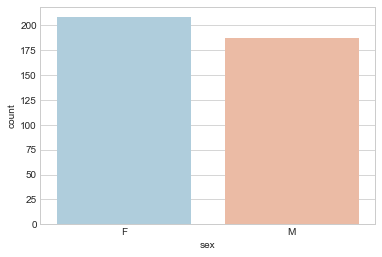

In [585]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=df_math,palette='RdBu_r')

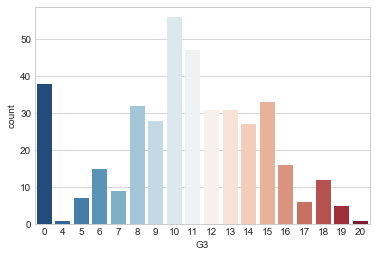

In [586]:
sns.set_style('whitegrid')
sns.countplot(x='G3',data=df_math,palette='RdBu_r')

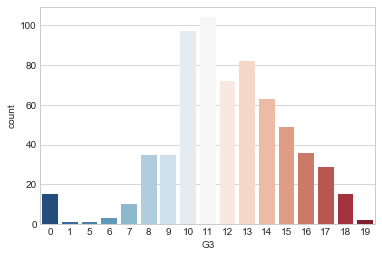

In [587]:
sns.set_style('whitegrid')
sns.countplot(x='G3',data=df_port,palette='RdBu_r')

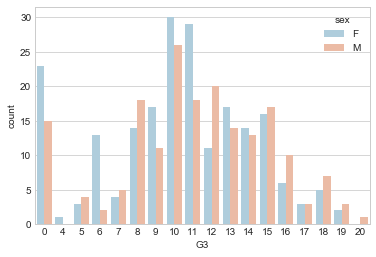

In [588]:
sns.set_style('whitegrid')
sns.countplot(x='G3',hue='sex',data=df_math,palette='RdBu_r')

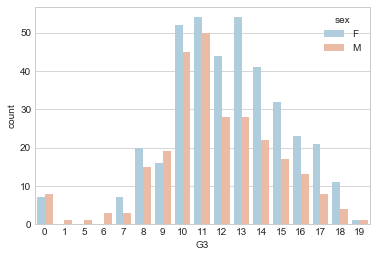

In [589]:
sns.set_style('whitegrid')
sns.countplot(x='G3',hue='sex',data=df_port,palette='RdBu_r')


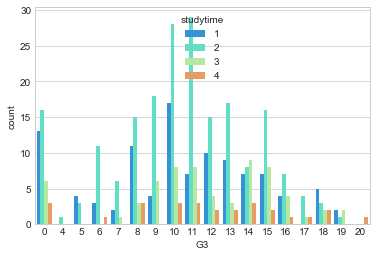

In [590]:
sns.set_style('whitegrid')
sns.countplot(x='G3',hue='studytime',data=df_math,palette='rainbow')


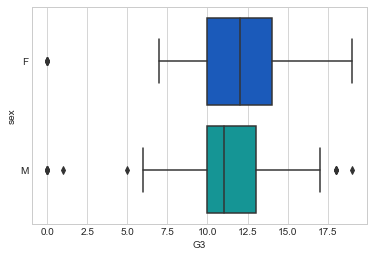

In [591]:

sns.boxplot(x='G3',y='sex',data=df_port,palette='winter')

In [592]:
"""cat_data <- [“school”,”sex”,”address”,”famsize”,”Pstatus”,”schoolsup”,”famsup”,“paid”,”activities”, “nursery”,
”higher”, “internet”,”romantic”]

nominal_cat <- [“Mjob”,”Fjob”,”reason”,”guardian”]

numeric_data <-  [“age”,”Medu”,”Fedu”,”traveltime”,”studytime”,“famrel”,”freetime”,”goout”,”Dalc”,”Walc”,”health”,
”absences”,“failures”,”G2″,”G1″,”G3″]"""

'cat_data <- [“school”,”sex”,”address”,”famsize”,”Pstatus”,”schoolsup”,”famsup”,“paid”,”activities”, “nursery”,\n”higher”, “internet”,”romantic”]\n\nnominal_cat <- [“Mjob”,”Fjob”,”reason”,”guardian”]\n\nnumeric_data <-  [“age”,”Medu”,”Fedu”,”traveltime”,”studytime”,“famrel”,”freetime”,”goout”,”Dalc”,”Walc”,”health”,\n”absences”,“failures”,”G2″,”G1″,”G3″]'

In [593]:
cat_data = pd.get_dummies(df_port[['school', 'sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']],drop_first=True)
#cat_data = cat_data.drop(['school_GP','sex_F', 'address_R','famsize_GT3', 'Pstatus_A', 'schoolsup_no', 'famsup_no','paid_no', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_no'], axis = 1)
cat_data.head()

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,0,0,1,0,0,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0,1,1,0
2,0,0,1,1,1,1,0,0,0,1,1,1,0
3,0,0,1,0,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,0,1,0,0,1,1,0,0


In [594]:
nominal_cat = pd.get_dummies(df_port[['Mjob','Fjob','reason','guardian']],drop_first=True)
#nominal_cat = nominal_cat.drop(['Fjob_other','guardian_father'], axis = 1)
nominal_cat.head()

,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0


In [595]:
numeric_data = df_port[['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','absences','failures']]
numeric_data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,failures
0,18,4,4,2,2,4,3,4,1,1,3,4,0
1,17,1,1,1,2,5,3,3,1,1,3,2,0
2,15,1,1,1,2,4,3,2,2,3,3,6,0
3,15,4,2,1,3,3,2,2,1,1,5,0,0
4,16,3,3,1,2,4,3,2,1,2,5,0,0


In [596]:
grades = pd.DataFrame()
#pass = 1, fail = 0
def passfail(grade):
    if grade >=10:
        return 1
    if grade <10:
        return 0
grades['G1'] = df_port['G1'].apply(passfail)
grades['G2'] = df_port['G2'].apply(passfail)
grades['G3'] = df_port['G3'].apply(passfail)
grades.head()

,G1,G2,G3
0,0,1,1
1,0,1,1
2,1,1,1
3,1,1,1
4,1,1,1


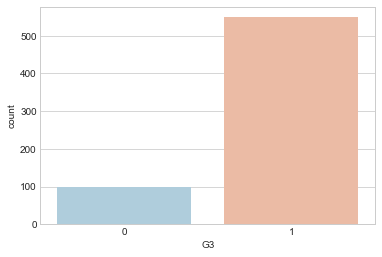

In [597]:
sns.set_style('whitegrid')
sns.countplot(x='G3',data=grades,palette='RdBu_r')

In [598]:
df = pd.concat([grades, cat_data,numeric_data, nominal_cat], axis = 1)
df.head()


,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,1,1,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,0,0,1,1,1,1,0,...,0,0,1,0,0,0,1,0,1,0
3,1,1,1,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
4,1,1,1,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,0


In [599]:
df.corr()

,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
G1,1.000000,0.621270,0.635928,-0.304577,-0.085244,0.143547,0.058705,-0.025752,-0.018211,0.053789,...,0.107894,0.030436,-0.016105,-0.009742,0.089738,0.094490,-0.052499,0.109322,-0.007315,-0.134318
G2,0.621270,1.000000,0.682985,-0.260169,-0.102068,0.120568,0.047791,0.012674,0.014405,0.060169,...,0.083466,0.022782,0.007428,-0.029372,0.081501,0.064117,-0.116769,0.088795,-0.051260,-0.088797
G3,0.635928,0.682985,1.000000,-0.297217,-0.078222,0.126663,0.052215,-0.004241,0.034527,0.037903,...,0.096404,0.012556,0.021943,-0.048640,0.047490,0.060466,-0.093849,0.123914,-0.045609,-0.047062
school_MS,-0.304577,-0.260169,-0.297217,1.000000,-0.083050,-0.354520,0.022252,0.028120,-0.123340,-0.063720,...,-0.103729,-0.052641,-0.063940,0.064697,-0.092356,-0.137548,0.205220,-0.162282,-0.052590,-0.016982
sex_M,-0.085244,-0.102068,-0.078222,-0.083050,1.000000,0.025503,0.098205,0.064700,-0.111202,-0.129467,...,0.104647,-0.007233,-0.034251,0.047612,0.044416,0.059079,0.034816,-0.027289,-0.030708,-0.010358
address_U,0.143547,0.120568,0.126663,-0.354520,0.025503,1.000000,0.046113,-0.094635,0.017956,0.005577,...,0.073149,0.072167,-0.064898,0.014508,0.028221,0.161183,-0.086910,-0.012882,0.015464,-0.035192
famsize_LE3,0.058705,0.047791,0.052215,0.022252,0.098205,0.046113,1.000000,-0.239608,-0.056405,-0.039819,...,0.039768,0.021832,0.016528,0.003410,-0.083334,0.023438,-0.046227,0.046385,0.017646,-0.015673
Pstatus_T,-0.025752,0.012674,-0.004241,0.028120,0.064700,-0.094635,-0.239608,1.000000,-0.009456,0.010203,...,0.027986,-0.004180,-0.073386,0.097317,-0.011516,-0.040492,0.042910,-0.038142,-0.070786,-0.114559
schoolsup_yes,-0.018211,0.014405,0.034527,-0.123340,-0.111202,0.017956,-0.056405,-0.009456,1.000000,0.075402,...,-0.056772,0.070481,-0.014747,-0.055696,0.070951,0.052495,0.007306,0.024482,-0.018390,-0.026798
famsup_yes,0.053789,0.060169,0.037903,-0.063720,-0.129467,0.005577,-0.039819,0.010203,0.075402,1.000000,...,0.028670,0.083770,-0.064231,-0.007044,0.026580,0.027275,-0.092220,0.048130,-0.034759,0.050158


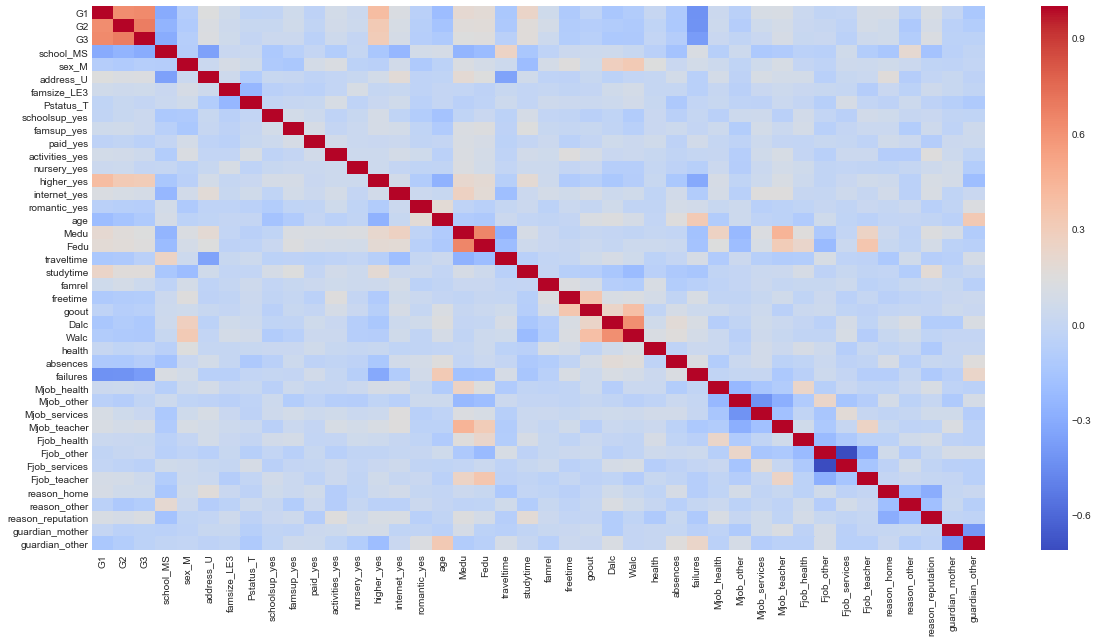

In [600]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [601]:
X = df.drop(['G1','G2','G3'], axis = 1)
y = df['G1']

In [602]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Logistic Regression

In [793]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [794]:
y_pred = logmodel.predict(X_test)

In [795]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.62      0.43      0.51        49
          1       0.85      0.92      0.88       166

avg / total       0.79      0.81      0.80       215



In [796]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    #if normalize:
    #    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #    print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [869]:
# generate evaluation metrics
print ("Train - Accuracy : {:.2f}%".format(metrics.accuracy_score(y_train, logmodel.predict(X_train))*100))
print ("Test - Accuracy : {:.2f}%".format(metrics.accuracy_score(y_test, logmodel.predict(X_test))*100))

Train - Accuracy : 84.56%
Test - Accuracy : 80.93%


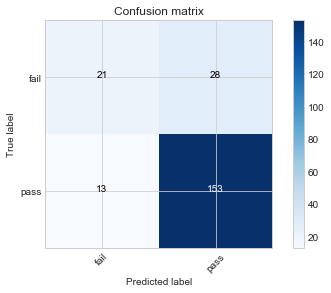

In [798]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred), ['fail', 'pass'])

### Logistic Regression with Regularization

In [876]:
Cs = np.logspace(-4., 4., 30)
logCV = LogisticRegressionCV(cv=10)

In [877]:
logCV.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [878]:
y_pred_logCV = logCV.predict(X_test)

In [879]:
print(classification_report(y_test,y_pred_logCV))

             precision    recall  f1-score   support

          0       0.60      0.43      0.50        49
          1       0.84      0.92      0.88       166

avg / total       0.79      0.80      0.79       215



In [880]:
# generate evaluation metrics
print ("Train - Accuracy : {:.2f}%".format(metrics.accuracy_score(y_train, logCV.predict(X_train))*100))
print ("Test - Accuracy : {:.2f}%".format(metrics.accuracy_score(y_test, logCV.predict(X_test))*100))

Train - Accuracy : 85.25%
Test - Accuracy : 80.47%


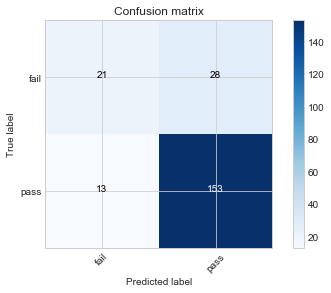

In [875]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred_logCV), ['fail', 'pass'])

## Using KNN



In [701]:
normalizer = preprocessing.Normalizer()
X_norm = normalizer.fit_transform(X)

In [702]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

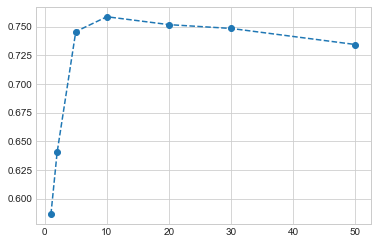

In [767]:
#y score is a list of number...
k_list = [1, 2, 5, 10, 20, 30, 50]
k_x = []
k_y = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_norm,y_train)
    y_scores_knn = knn.predict_proba(X_test_norm)[:,1]
    k_x.append(k)
    k_y.append(roc_auc_score(y_test, y_scores_knn))

#roc_auc_score vs. k

plt.plot(k_x, k_y, linestyle='dashed', marker='o')



k = 10

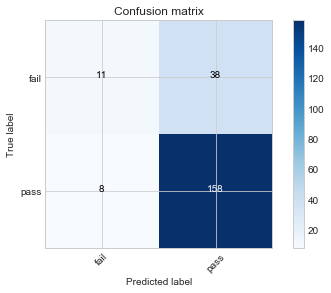

In [770]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_norm,y_train)
y_pred_knn = knn.predict(X_test_norm)
plot_confusion_matrix(confusion_matrix(y_test,y_pred_knn), ['fail', 'pass'])

In [772]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

          0       0.58      0.22      0.32        49
          1       0.81      0.95      0.87       166

avg / total       0.75      0.79      0.75       215



### ROC Curve

In [688]:
from sklearn.metrics import roc_curve

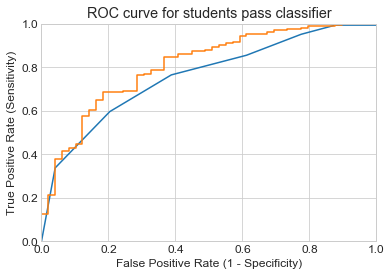

In [737]:
y_scores_knn = knn.predict_proba(X_test_norm)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_scores_knn)

y_scores_log = logCV.predict_proba(X_test_norm)[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_scores_log)

plt.plot(fpr_knn, tpr_knn)
plt.plot(fpr_log, tpr_log)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for students pass classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.grid(True)